# Covid 19 Data Analysis
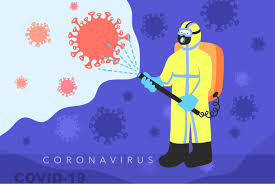

# Importing The Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import calendar
plotly.offline.init_notebook_mode (connected = True)
!pip install pygal

In [ ]:
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def pygalplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

# Importing The Data

In [ ]:
data=pd.read_csv('../input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv',low_memory=False)

# Having a look at the data

In [ ]:
data.head()

### Dropping all the null value rows

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['pos_spec_dt']=pd.to_datetime(data['pos_spec_dt'])

# Effect Of Month on the number of cases

In [ ]:
data['Month']=pd.DatetimeIndex(data['pos_spec_dt']).month

In [ ]:
px.bar(x=data['Month'].value_counts().index,y=data['Month'].value_counts().values,color=data['Month'].value_counts(),labels={'x':'Months','y':'Number of cases'})

We can clearly see that the number of cases have been increasing since month 2 where they were minimum and have become the max in the last 2 months .

# Impact of Age on the Cases Over Time(will take few moments to load )

In [ ]:
df_plot = data.sample(frac=0.4).copy()

In [ ]:
fig2 = px.density_contour(df_plot, x="Month", y="age_group")
fig2.update_traces(contours_coloring="fill", contours_showlabels = True)
fig2.show()

We can clearly see the trendline and the increase in the number of cases in the age group of 20 - 29 in the months of 10 and 11 which shows the sudden growth in the cases in the people of this and other age groups .

# Sunburst Chart For Day,Sex and Race and ethnicity

In [ ]:
data['Day']=data['pos_spec_dt'].apply(lambda x: calendar.day_name[x.weekday()])
grouped_data=data.groupby(['Day','sex','Race and ethnicity (combined)']).count()
df=pd.DataFrame()
df['sex']=np.array(list(grouped_data.index))[:,1]
df['day']=np.array(list(grouped_data.index))[:,0]
df['race']=np.array(list(grouped_data.index))[:,2]
df['Count']=grouped_data['age_group'].values


### You can click on and Field to expand it (try) :)
##### For Ex. Click Monday

In [ ]:
fig = px.sunburst(df, path=['sex', 'day', 'race'], values='Count', color='day')
fig.show()

From this plot we can clearly see that most of the cases are been observed during the weekdays and less number are seen during the weekends . This may be due to less number of people going to get checked on weekends .

We can also observe that the data on females is slightly more than the data on males in this dataset :)

# Parellal Relation Between Sex , Age Group and Death Status

In [ ]:
fig3 = px.parallel_categories(df_plot, dimensions=['sex','age_group','death_yn'],
                 color_continuous_scale=px.colors.sequential.Inferno,
                labels={'sex':'Patient sex', 'age_group':'Age Group Of The Patient', 'death_yn':'Death Status Of The Person'})

In [ ]:
fig3.show()

We can clearly see that the if the patient is of high age there is a high chance for him to die due to covid illness :( 

# Thank you !! :)
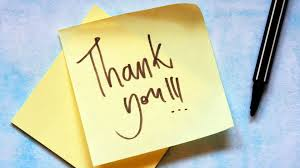